<a href="https://colab.research.google.com/github/D1emonk/My-repo/blob/main/Lesson_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1> Boston

In [36]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score, precision_score, recall_score, f1_score, log_loss
from sklearn.datasets import load_diabetes, load_iris
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.model_selection import train_test_split
from collections import Counter
from google.colab import drive
from sklearn.svm import NuSVC, SVC, SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [18]:
df = pd.read_csv('/content/drive/MyDrive/BostonHousing.csv')

In [19]:
df.head(10)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 1 columns):
 #   Column                                                                                            Non-Null Count  Dtype 
---  ------                                                                                            --------------  ----- 
 0    0.00632  18.00   2.310  0  0.5380  6.5750  65.20  4.0900   1  296.0  15.30 396.90   4.98  24.00  505 non-null    object
dtypes: object(1)
memory usage: 4.1+ KB


In [25]:
X = df.iloc[:, [0, 1, 2, 4, 5, 6, 8, 9, 10, 12]].values
y = df.iloc[:, 13].values
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=10)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
# Создаем модель
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
# Компилируем модель
model.compile(optimizer='adam',
              loss='mse',  # Среднеквадратичная ошибка (MSE)
              metrics=['mae'])  # Средняя абсолютная ошибка (MAE)


In [27]:
# Обучаем модель
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_split=0.2, verbose=1)

Epoch 1/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 500.4853 - mae: 20.6019 - val_loss: 518.7776 - val_mae: 21.1101
Epoch 2/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 449.1906 - mae: 19.3426 - val_loss: 416.4703 - val_mae: 18.6740
Epoch 3/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 329.7703 - mae: 16.1720 - val_loss: 258.4039 - val_mae: 14.2085
Epoch 4/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 206.6778 - mae: 12.2577 - val_loss: 104.4782 - val_mae: 7.7862
Epoch 5/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 53.1339 - mae: 5.7407 - val_loss: 62.4481 - val_mae: 5.2777
Epoch 6/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 40.3753 - mae: 4.5023 - val_loss: 53.7186 - val_mae: 4.7550
Epoch 7/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 27.8872 - mae: 3.7617 - val_loss: 47.6395 - val_mae: 4.3674
Epoch 8/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 23.6320 - mae: 3.6316 - val_loss: 44.5085 - val_mae: 4.1748
Epoch 9/100
21/21 ━━━━━━━━━━━━

In [28]:
# Оцениваем точность модели
test_mse, test_mae = model.evaluate(X_test, y_test, verbose=2)
print(f'\nТестовая MAE (средняя абсолютная ошибка): {test_mae:.2f} тыс. долларов')

4/4 - 0s - 11ms/step - loss: 16.5731 - mae: 2.7966

Тестовая MAE (средняя абсолютная ошибка): 2.80 тыс. долларов


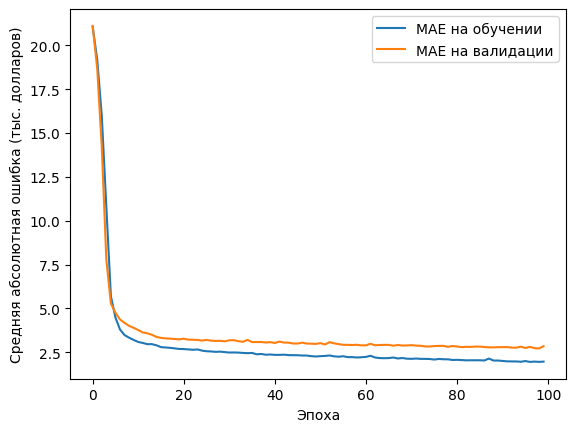

In [29]:
# График обучения
plt.plot(history.history['mae'], label='MAE на обучении')
plt.plot(history.history['val_mae'], label='MAE на валидации')
plt.xlabel('Эпоха')
plt.ylabel('Средняя абсолютная ошибка (тыс. долларов)')
plt.legend()
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


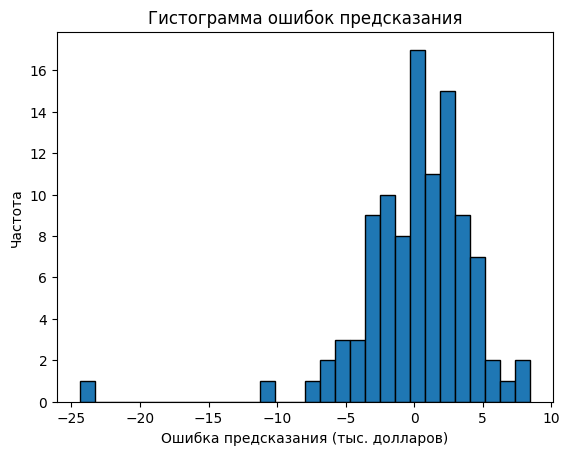

In [30]:
predictions = model.predict(X_test).flatten()  # Предсказанные цены
errors = predictions - y_test  # Разница между предсказанием и реальной ценой

plt.hist(errors, bins=30, edgecolor='black')
plt.xlabel("Ошибка предсказания (тыс. долларов)")
plt.ylabel("Частота")
plt.title("Гистограмма ошибок предсказания")
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


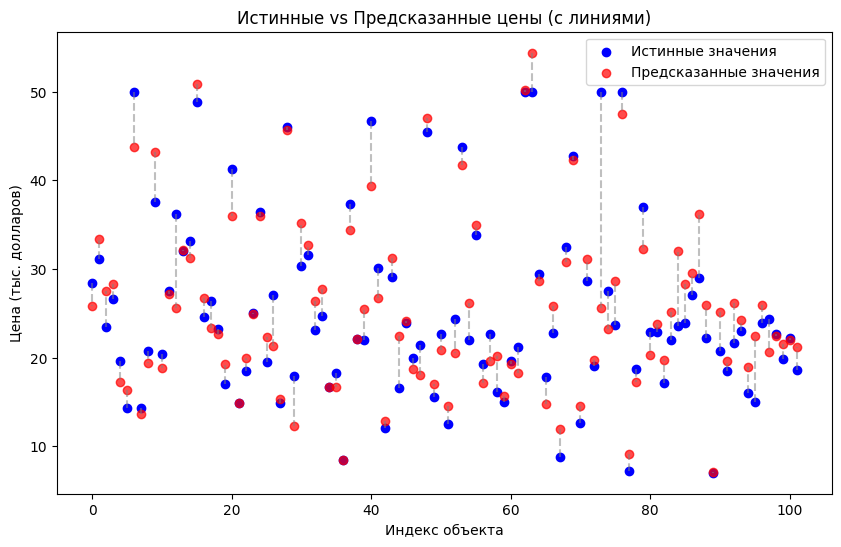

In [34]:
predictions = model.predict(X_test).flatten()
indices = np.arange(len(y_test))
plt.figure(figsize=(10, 6))
plt.scatter(indices, y_test, color='blue', label="Истинные значения")
plt.scatter(indices, predictions, color='red', label="Предсказанные значения", alpha=0.7)

for i in range(len(y_test)):
    plt.plot([indices[i], indices[i]], [y_test[i], predictions[i]], color='gray', linestyle='dashed', alpha=0.5)

plt.xlabel("Индекс объекта")
plt.ylabel("Цена (тыс. долларов)")
plt.title("Истинные vs Предсказанные цены (с линиями)")
plt.legend()
plt.show()

<h1> Mnist

In [38]:
# Загрузим данные
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Нормализуем данные
train_images = train_images / 255.0
test_images = test_images / 255.0

# Создаем модель
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(64),
    keras.layers.Dense(10)
])

# Компилируем модель
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Обучаем модель
model.fit(train_images, train_labels, epochs=10)

# Оценим точность модели
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nТестовая точность:', test_acc)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8698 - loss: 0.4442
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9618 - loss: 0.1296
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9731 - loss: 0.0872
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9786 - loss: 0.0680
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9824 - loss: 0.0561
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9847 - loss: 0.0507
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9876 - loss: 0.0389
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9875 - loss: 0.0370
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9903 - loss: 0.0292
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9905 - loss: 0.0276
313/313 - 1s - 3ms/step - accuracy: 0.9683 - loss: 0.1153

Тестовая точность: 0.9682999849319458


In [39]:
class_names = ['0', '1', '2', '3', '4',
               '5', '6', '7', '8', '9']

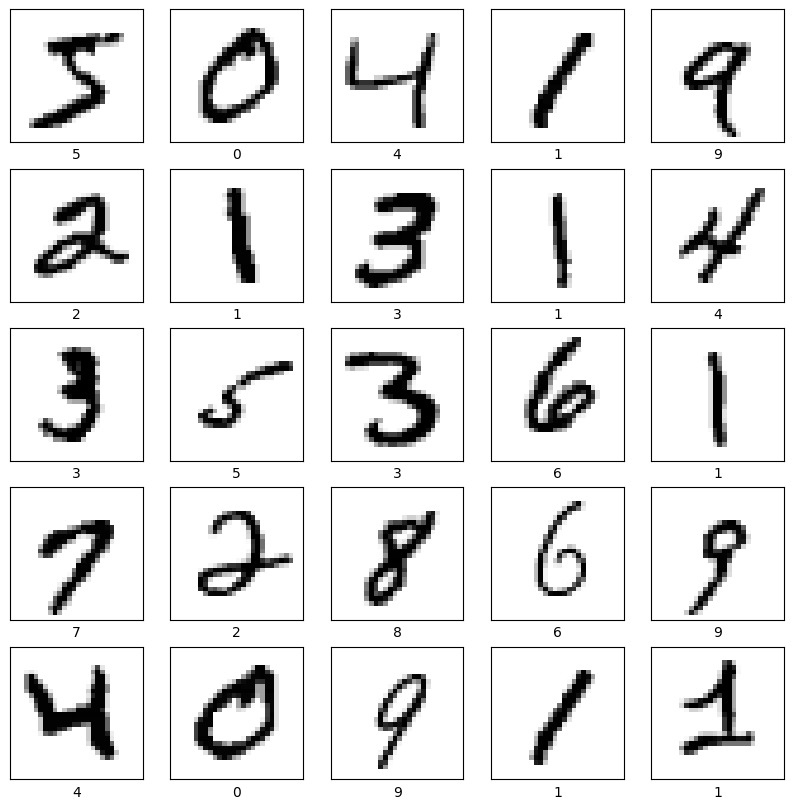

In [40]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])